In [1]:
import pandas as pd
import glob
import numpy as np

from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import tensorflow as tf

import time


import matplotlib.pyplot as plt

from sklearn.model_selection import KFold# FUNCIONES GRAFICAS:

# FUNCIONES GRAFICAS:

In [2]:
def plot_history1(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,plt.ylim()[1]])
    plt.legend()
    plt.show()

In [3]:
def plot_history2(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,plt.ylim()[1]])
    plt.legend()
    plt.show()

In [4]:
def plot_comparacion(test_x,test_y):
    plt.scatter( test_y , test_x )
    plt.xlabel('True Values [MPG]')
    plt.ylabel('Predictions [MPG]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot(test_y , test_y , color = 'orange')
    plt.show()

In [5]:
def plot_histograma(test_x,test_y):
    error = test_x - test_y
    plt.hist(error, bins = 25)
    plt.xlabel("Prediction Error [MPG]")
    _ = plt.ylabel("Count")
    plt.show()

# Preparacion de los datos NN simple

In [6]:
a_x2 = np.loadtxt('datos_x_2.txt')
a_y2 = np.loadtxt('datos_y_2.txt')

In [7]:
x = a_x2.reshape(( int(len(a_x2)/72) ,72))
y = a_y2.reshape(( int(len(a_y2)/72) ,72))

# Definimos el metodo k-folds

In [16]:
# Define the K-fold Cross Validator
num_folds = 4
kfold = KFold(n_splits=num_folds, shuffle=True)
#Definir valores de numero de capas y numero de fold en el que estamos trabajando:
fold_no = 1
capa = 2
num_folds 

4

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 72)                5256      
_________________________________________________________________
dense_62 (Dense)             (None, 30)                2190      
_________________________________________________________________
dense_63 (Dense)             (None, 72)                2232      
Total params: 9,678
Trainable params: 9,678
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 5 ...


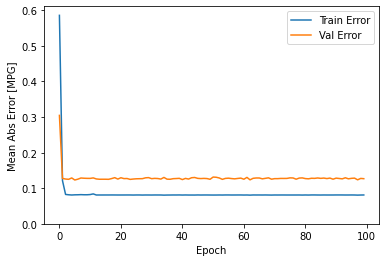

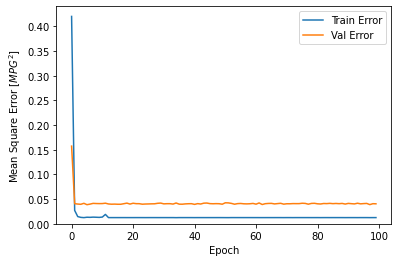

    
Segundo entrenamiento del modelo
    
    
    
    
Score for fold 5: loss of 0.01712983474135399; mae of 8.849099278450012%
Prediccion: 
[1.175707   1.1407951  1.1058494  1.075349   1.0453078  1.0192137
 1.         0.9829374  0.9653677  0.9520846  0.9454038  0.95895255
 1.0531734  1.041478   1.0271567  1.0121732  0.9957747  0.9809957
 0.9690532  0.9570398  0.94413394 0.9319097  0.92109156 0.91068393
 1.0241653  1.0152116  1.0056393  0.99389386 0.9811737  0.96997434
 0.9604188  0.9506235  0.94017524 0.9296815  0.9176751  0.90761995
 0.9697763  0.9668985  0.9620116  0.95524085 0.947512   0.9404391
 0.9340122  0.9273084  0.91993004 0.91194403 0.9032712  0.8940155
 0.9200201  0.9190186  0.9160966  0.91259116 0.9090273  0.90537775
 0.9022005  0.8985697  0.89425266 0.8892378  0.8837773  0.87759733
 0.8994899  0.89924383 0.8973423  0.89498824 0.89213336 0.889226
 0.88684577 0.8839624  0.88036585 0.8761819  0.87148005 0.86612767]
Real: 
[1.11731173 1.09630963 1.07410741 1.05610561 1.034

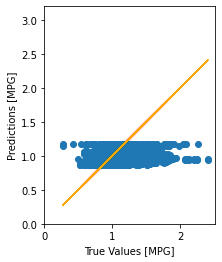

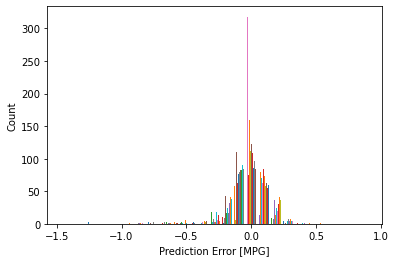

    
    
    
Terminamos hoja numero -------------------------------------------------->  5
    
    
    
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 72)                5256      
_________________________________________________________________
dense_65 (Dense)             (None, 30)                2190      
_________________________________________________________________
dense_66 (Dense)             (None, 72)                2232      
Total params: 9,678
Trainable params: 9,678
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 6 ...


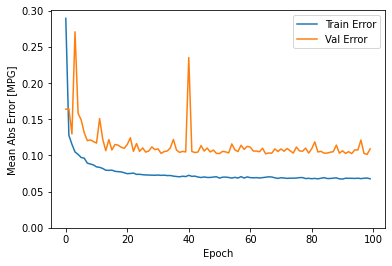

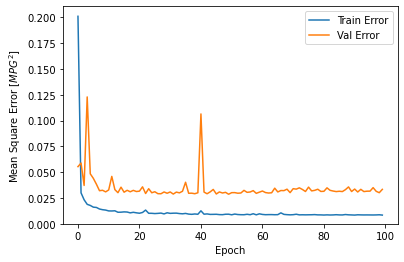

    
Segundo entrenamiento del modelo
    
    
    
    
Score for fold 6: loss of 0.013857821933925152; mae of 7.974840700626373%
Prediccion: 
[1.151066   1.1283319  1.1007565  1.0751857  1.0474148  1.0221366
 0.9994586  0.98192185 0.96387297 0.947559   0.9381915  0.9243217
 1.02916    1.0258316  1.0171033  1.005783   0.99340016 0.98296785
 0.97278565 0.9620624  0.9507111  0.9384015  0.9262442  0.9140429
 1.0139782  1.0104305  1.0035442  0.9936391  0.98469144 0.9763852
 0.96904296 0.9607235  0.9506779  0.9415964  0.9312336  0.9203387
 0.97804064 0.9755097  0.9706488  0.96472466 0.9586176  0.9526732
 0.9478526  0.942051   0.93543506 0.9291012  0.92132354 0.9141064
 0.9295736  0.92925173 0.92773056 0.92568606 0.92406404 0.9221163
 0.9201644  0.91725725 0.9138367  0.9100629  0.90601987 0.90143085
 0.9093337  0.90970755 0.90906507 0.9083869  0.908075   0.90677804
 0.9058255  0.9042201  0.9014222  0.89882976 0.8956138  0.8915291 ]
Real: 
[1.13647343 1.11413043 1.09178744 1.06400966 1.0428

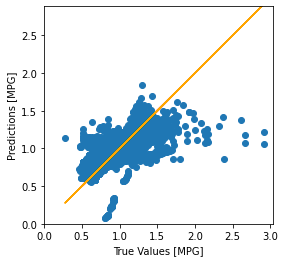

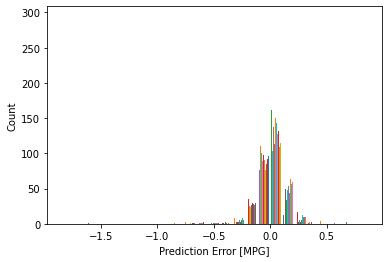

    
    
    
Terminamos hoja numero -------------------------------------------------->  6
    
    
    
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 72)                5256      
_________________________________________________________________
dense_68 (Dense)             (None, 30)                2190      
_________________________________________________________________
dense_69 (Dense)             (None, 72)                2232      
Total params: 9,678
Trainable params: 9,678
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 7 ...


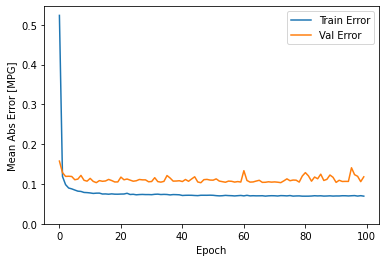

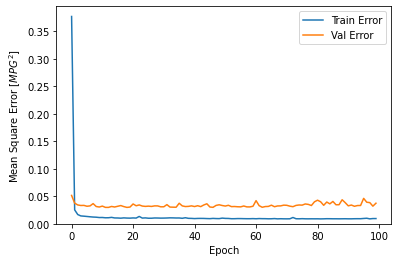

    
Segundo entrenamiento del modelo
    
    
    
    
Score for fold 7: loss of 0.012394779361784458; mae of 7.597488164901733%
Prediccion: 
[1.184968   1.1648847  1.142487   1.1175258  1.0902038  1.0623146
 1.0000532  0.95021623 0.939175   0.91153884 0.8922414  0.87864476
 1.0450329  1.0352795  1.0218052  1.0046833  0.9848663  0.9634255
 0.9471482  0.93016565 0.9191386  0.9052744  0.8945062  0.8689639
 0.9372783  0.9312304  0.92174387 0.91207564 0.90075606 0.8874479
 0.8783033  0.8719513  0.8636202  0.85513586 0.8485344  0.8320438
 0.88191414 0.8760104  0.8695156  0.86198735 0.8551978  0.84831715
 0.83950347 0.83287597 0.8269572  0.8193194  0.81051254 0.8023747
 0.77642    0.7759847  0.77404606 0.771862   0.7677001  0.7638238
 0.75865024 0.7547303  0.7500528  0.744831   0.7402219  0.73433465
 0.7546978  0.75535965 0.7543475  0.75412244 0.7513957  0.74828494
 0.7439669  0.7407872  0.7372338  0.7324012  0.7285935  0.72380275]
Real: 
[1.09821817 1.08083442 1.06388527 1.04606693 1.029

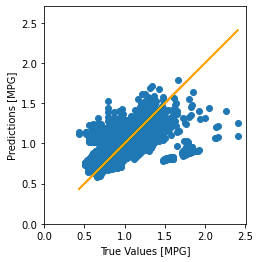

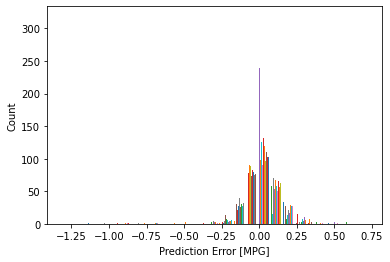

    
    
    
Terminamos hoja numero -------------------------------------------------->  7
    
    
    
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 72)                5256      
_________________________________________________________________
dense_71 (Dense)             (None, 30)                2190      
_________________________________________________________________
dense_72 (Dense)             (None, 72)                2232      
Total params: 9,678
Trainable params: 9,678
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 8 ...


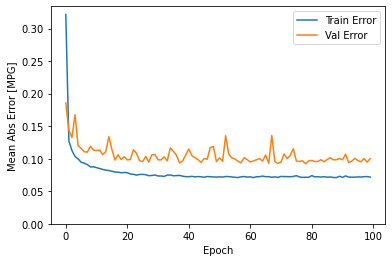

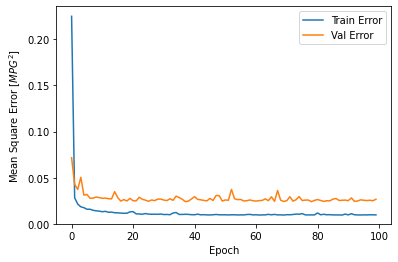

    
Segundo entrenamiento del modelo
    
    
    
    
Score for fold 8: loss of 0.015195133164525032; mae of 7.7814556658267975%
Prediccion: 
[1.1290674  1.1062776  1.0842564  1.0597209  1.037298   1.0164798
 0.9987104  0.98671716 0.9738314  0.9592856  0.94704163 0.92887264
 0.9959108  0.99012434 0.98258525 0.97651815 0.9679319  0.9566226
 0.94997835 0.94211036 0.93338305 0.92343587 0.9119423  0.9056424
 0.96498436 0.9605202  0.95522594 0.9484401  0.9407917  0.93472856
 0.9291892  0.9226846  0.9158612  0.9079262  0.89961094 0.89038223
 0.9183411  0.9170972  0.9142115  0.91019374 0.9060134  0.9024425
 0.8987811  0.89431226 0.88938934 0.88387036 0.87812877 0.8716091
 0.8611571  0.86158085 0.86061096 0.85982895 0.859555   0.859259
 0.8581097  0.85605085 0.85356385 0.8505773  0.8472304  0.843198
 0.8329197  0.8352799  0.8367272  0.8378209  0.83866763 0.838726
 0.83836234 0.8371938  0.8353155  0.8329452  0.83054394 0.82716584]
Real: 
[1.1204576  1.09387618 1.06864065 1.04710633 1.022207

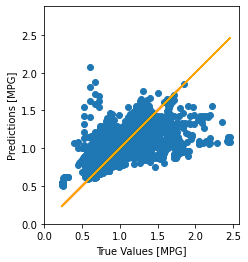

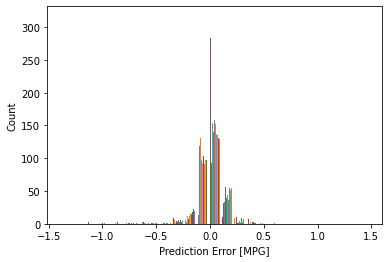

    
    
    
Terminamos hoja numero -------------------------------------------------->  8
    
    
    


In [18]:
# K-fold Cross Validation model evaluation
acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(x, y):
    
    #CREACION DEL MODELO
    modelo = Sequential()
    modelo.add(Dense(72,input_shape=(72,)))
    #modelo.add(Dense(30,activation= 'relu'))
    #modelo.add(Dense(15,activation= 'relu'))
    modelo.add(Dense(30,activation= 'relu'))
    modelo.add(Dense(72))
    modelo.summary()

    # COMPILACION DEL MODELO
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    modelo.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # ENTRENAMIENTO DE LOS DATOS:
    
    x_train_1 = x[train][:int(len(x[train])/4 * 3)]
    x_val = x[train][int(len(x[train])/4 * 3):]
    y_train_1 = y[train][:int(len(y[train])/4 * 3)]
    y_val = y[train][int(len(y[train])/4 * 3):]
    
    history = modelo.fit(x_train_1, y_train_1,
                         validation_data=(x_val, y_val),
                         batch_size=1,
                         epochs=100,
                         verbose=0)
    
    #GRAFICAS DEL PRIMER ENTRENAMIENTO:
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.to_csv('Hist_' + str(fold_no) + '_C' + str(capa) + '.csv')
    
    plot_history1(history)
    time.sleep(10) 
    plot_history2(history)
    time.sleep(10) 
    
 
    # ENTRENAMIENTO DEL MODELO DE SEGUNDA VEZ 
    print('    ')
    print('Segundo entrenamiento del modelo')
    print('    ')
    a = modelo.fit(x[train], y[train],
                   batch_size=1,
                   epochs=100,
                   verbose=0)

    hist2 = pd.DataFrame(a.history)
    hist2['epoch'] = a.epoch
    
    # EVALUAMOS EL MODELO
    scores = modelo.evaluate(x[test], y[test], verbose=0)
    print('    ')
    print('    ')
    print('    ')
    print(f'Score for fold {fold_no}: {modelo.metrics_names[0]} of {scores[0]}; {modelo.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])
    
    #REALIZAMOS LAS PREDICCIONES:
    test_x = modelo.predict(x[test])
    test_y = y[test]

    #MOSTRAMOS UNA DE LA SPREDICCIONES PARA COMPARAR REAL-PREDICCION:
    print('Prediccion: ')
    print(test_x[1])
    print('Real: ')
    print(test_y[1])
    
    #GRAFICAS DEL SEGUNDO ENTRENAMIENTO:
    plot_comparacion(test_x, test_y)
    
    plot_histograma(test_x,test_y)
        
    
    print('    ')
    print('    ')
    print('    ')
    print('Terminamos hoja numero --------------------------------------------------> ' , fold_no )
    print('    ')
    print('    ')
    print('    ')
    
    # INCREMENTAMOS EL NUMERO DE HOJAS:
    
    fold_no = fold_no + 1

In [ ]:
xdata = np.linspace(0,1,6)
ydata = np.linspace(0,1,12)
X,Y = np.meshgrid(xdata,ydata)
Z = x[1].reshape(6,12)
xdata , ydata , X , Y , Z.T

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
#X, Y = np.meshgrid(x, y) ------>problema con esto.
ax.plot_surface(X, Y, z.T)
ax.set_xlabel('Days', fontsize=14)
ax.set_ylabel('Moneyness', fontsize=14)
ax.set_zlabel('$\sigma$', fontsize=14)